In [71]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(sys.executable)
sys.path.append("../src")
from cleaning import load_data,data_taste


c:\Users\Mega Pc\OneDrive\Desktop\Survey mini project\venv\Scripts\python.exe


In [72]:
df = pd.read_excel("../data/Survey.xlsx")
print(df.head())

   ID          Start time     Completion time      Email  Name  \
0   1 2025-12-14 21:23:50 2025-12-14 21:26:45  anonymous   NaN   
1   2 2025-12-14 21:21:21 2025-12-14 21:28:25  anonymous   NaN   
2   3 2025-12-14 21:22:50 2025-12-14 21:38:59  anonymous   NaN   
3   4 2025-12-14 21:38:14 2025-12-14 21:42:01  anonymous   NaN   
4   5 2025-12-14 21:22:49 2025-12-14 21:44:35  anonymous   NaN   

   Last modified time  Age Gender marital_status marriage_planning  ...  \
0                 NaN   27    Man             No               Yes  ...   
1                 NaN   22  Woman             No               Yes  ...   
2                 NaN   34  Woman            Yes               NaN  ...   
3                 NaN   24  Woman             No               Yes  ...   
4                 NaN   31  Woman            Yes               NaN  ...   

  ideal_children_number ideal_age_first_child  \
0                     1                    30   
1                     3                    28   
2    

In [73]:
moyenne_age = df["Age"].mean()
médiane_age = df["Age"].median()
print("La moyenne d'âge des participants est de :", moyenne_age)
print("La médiane d'âge des participants est de :", médiane_age)

La moyenne d'âge des participants est de : 29.1875
La médiane d'âge des participants est de : 26.0


Répartition des genres : Gender
Woman    29
Man      19
Name: count, dtype: int64


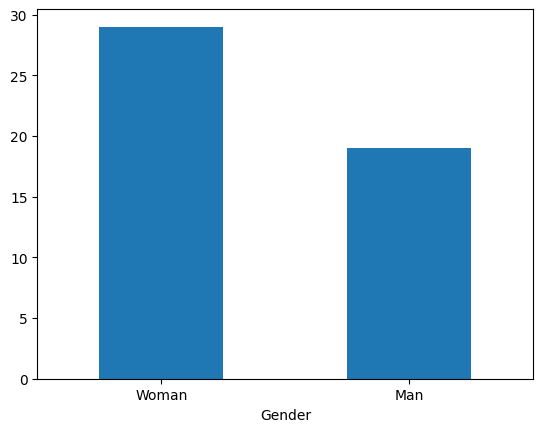

In [74]:
genders_counts = df["Gender"].value_counts()
print("Répartition des genres :", genders_counts)
genders_counts.plot(kind="bar", rot = 0)
plt.show()

Text(0.5, 1.0, 'Pourcentage de personnes mariées vs non mariées')

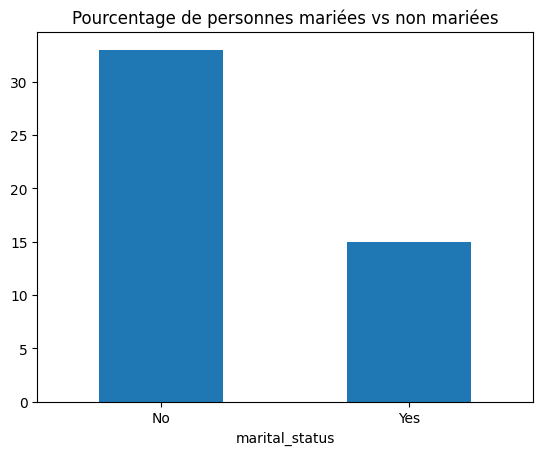

In [75]:
# Calcul du pourcentage de personnes mariées vs non mariées
marital_status = df["marital_status"].value_counts()
marital_status.plot(kind="bar", rot =0)
plt.title("Pourcentage de personnes mariées vs non mariées")

Text(0.5, 1.0, 'Quel est le pourcentage de femmes mariées ?')

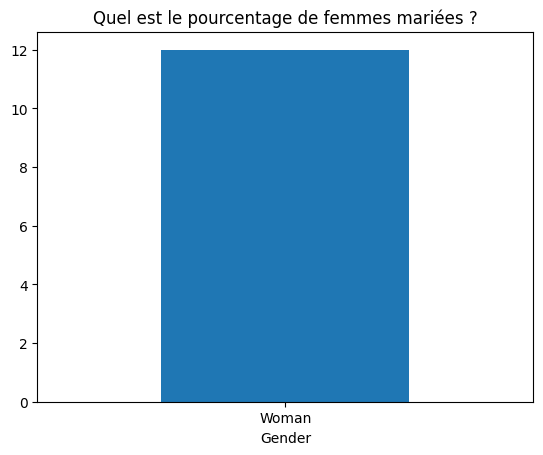

In [76]:
#Quel est le pourcentage de femmes mariées ?
married_women = df[(df["Gender"] == "Woman")&(df["marital_status"] == "Yes")]
married_women_count=married_women["Gender"].value_counts()
married_women_count.plot(kind="bar",rot=0)
plt.title("Quel est le pourcentage de femmes mariées ?")

Text(0.5, 1.0, 'Pourcentage de femmes mariées vs Pourcentages des hommes mariés ?')

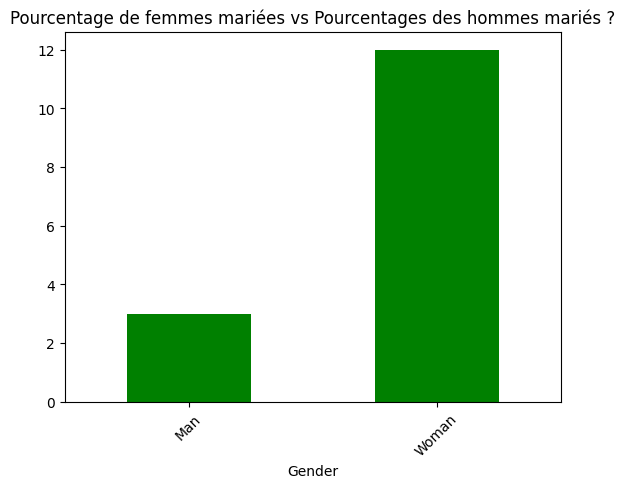

In [77]:
#Pourcentage de femmes mariées vs Pourcentages des hommes mariés ?
gender_comparison = df[df["marital_status"] == "Yes"].groupby("Gender")
gender_comparison_count = gender_comparison["Gender"].value_counts()
gender_comparison_count.plot(kind = "bar",rot = 45,color = "green")
plt.title("Pourcentage de femmes mariées vs Pourcentages des hommes mariés ?")

<Axes: xlabel='household_chores'>

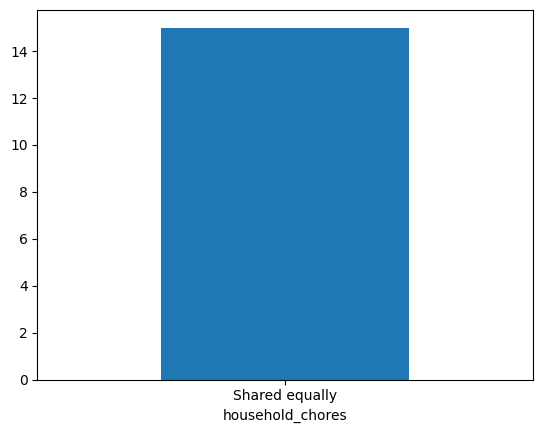

In [78]:
#Pourcentage de ceux qui pensent que les tâches ménagères doivent être partagées équitablement ?
shared_chores = df[df["household_chores"] == "Shared equally"]
shared_chores_count= shared_chores["household_chores"].value_counts()
shared_chores_count.plot(kind="bar",rot = 0)

<Axes: xlabel='household_chores'>

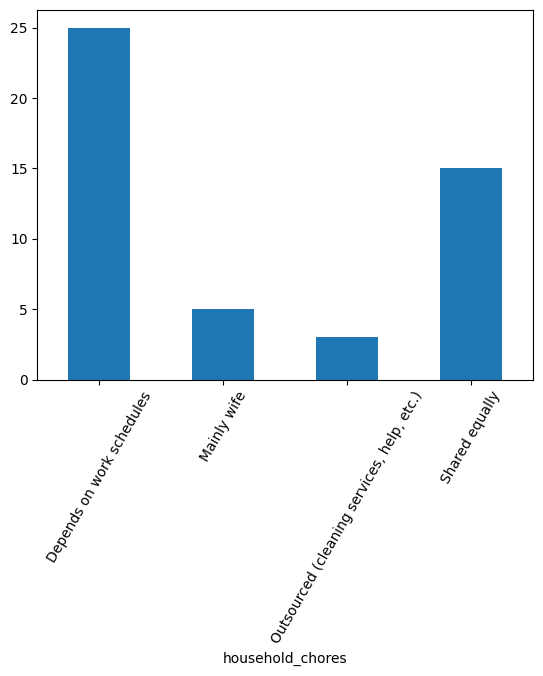

In [79]:
#Pourcentage des differentes perspectives sur les taches menagères
chores_comparison = df.groupby("household_chores")
chores_comparison_count = chores_comparison["household_chores"].value_counts()
chores_comparison_count.plot(kind="bar",rot = 60)

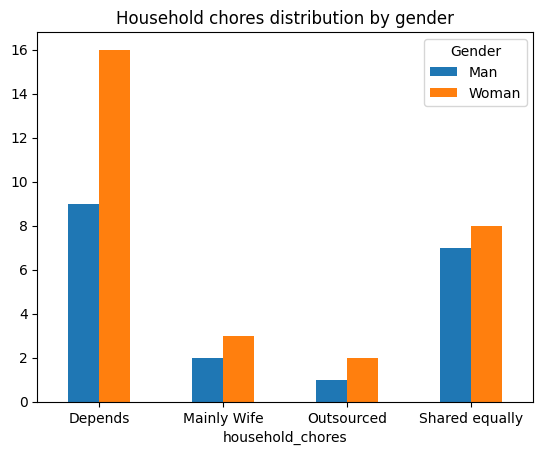

In [80]:
fig, ax =plt.subplots()
chores_by_gender = df.groupby(["household_chores","Gender"]).size().unstack(fill_value=0)
chores_by_gender.plot(kind="bar",ax = ax,rot = 0)
custom_labels = ["Depends", "Mainly Wife", "Outsourced", "Shared equally"]
ax.set_xticklabels(custom_labels)
ax.set_title("Household chores distribution by gender")
plt.show()

Text(0.5, 1.0, 'Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes')

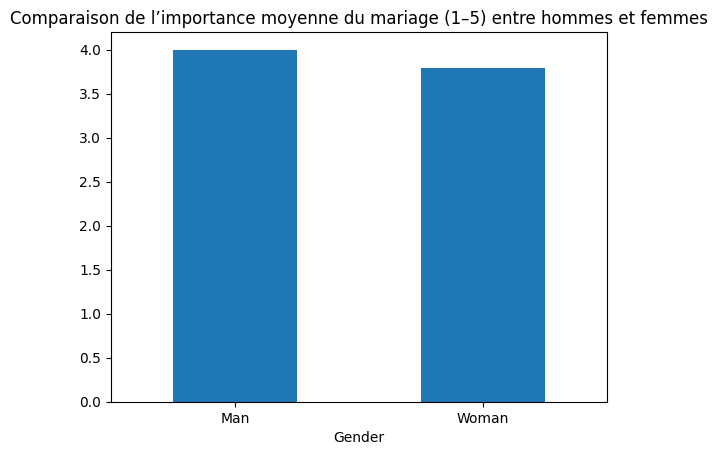

In [81]:
#Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes.
marriage_importance = df.groupby("Gender")["marriage_importance"].mean()
marriage_importance.plot(kind="bar",rot = 0)
plt.title("Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes")


Text(0.5, 1.0, "les femmes mariées qui pensent partager equitablement les 'house chores'")

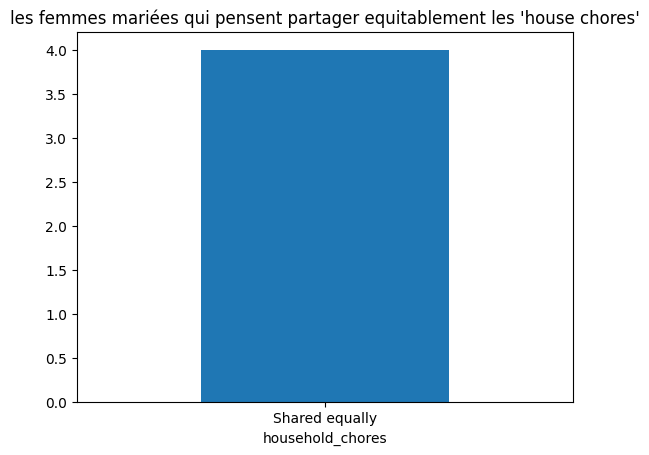

In [82]:
#Parmi les femmes mariées, le pourcentage de ceux qui pensent que les tâches ménagères doivent être partagées équitablement
shared_equally = df[(df["marital_status"] == "Yes") & (df["Gender"] == "Woman") & (df["household_chores"] == "Shared equally")]
shared_equally_count = shared_equally["household_chores"].value_counts()
shared_equally_count.plot(kind = "bar", rot = 0)
plt.title("les femmes mariées qui pensent partager equitablement les 'house chores'")

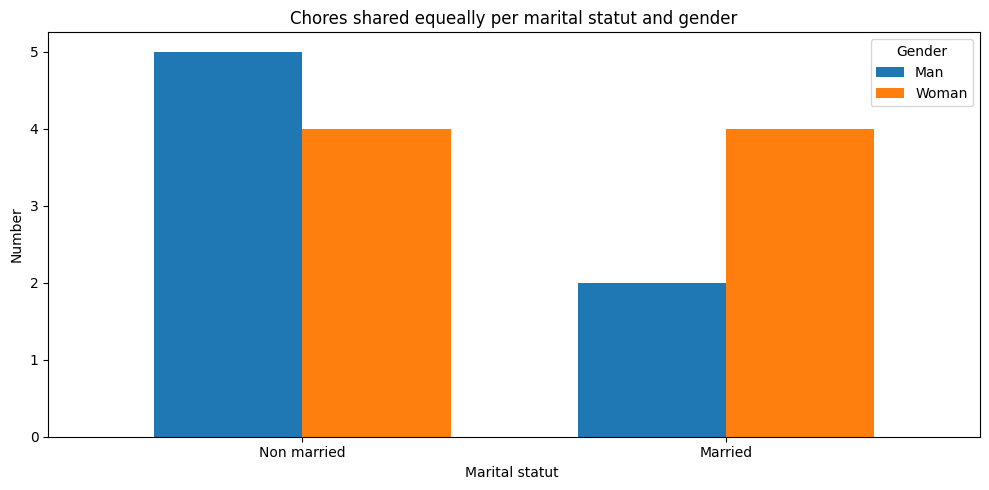

In [83]:
#vs femmes non mariées - deux groupes dans une seule figure
fig, ax = plt.subplots(figsize=(10, 5))

# Grouper par marital_status et Gender, puis compter ceux qui pensent "Shared equally"
chores_data = df[df["household_chores"] == "Shared equally"].groupby(["marital_status", "Gender"]).size().unstack(fill_value=0)

# Créer le bar chart groupé
chores_data.plot(kind="bar", ax=ax, rot=0, width=0.7)

ax.set_title("Chores shared equeally per marital statut and gender")
ax.set_ylabel("Number")
ax.set_xlabel("Marital statut ")
ax.set_xticklabels(['Non married', 'Married'], rotation=0)

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

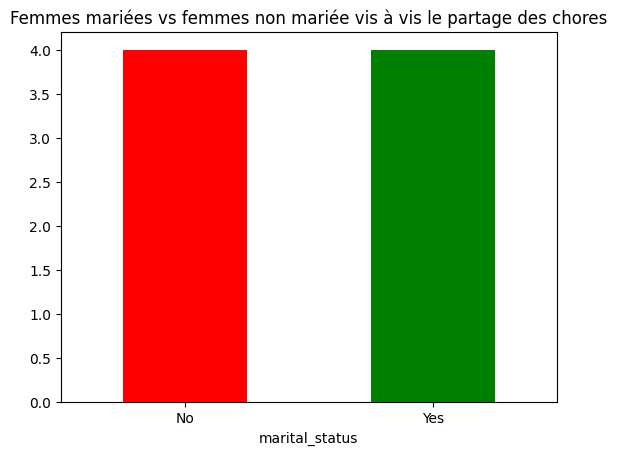

In [84]:
#Femmes mariées vs femmes non mariée
fig, ax = plt.subplots()
f_comp = df[(df["Gender"] == "Woman") & (df["household_chores"] == "Shared equally")].groupby("marital_status").size()
f_comp.plot(kind = "bar",ax = ax, rot = 0,color = ("r","g"))
plt.title("Femmes mariées vs femmes non mariée vis à vis le partage des chores")
plt.show()

[Text(0, 0, 'Flexible'),
 Text(1, 0, 'Husband'),
 Text(2, 0, 'One provider'),
 Text(3, 0, 'Split bills')]

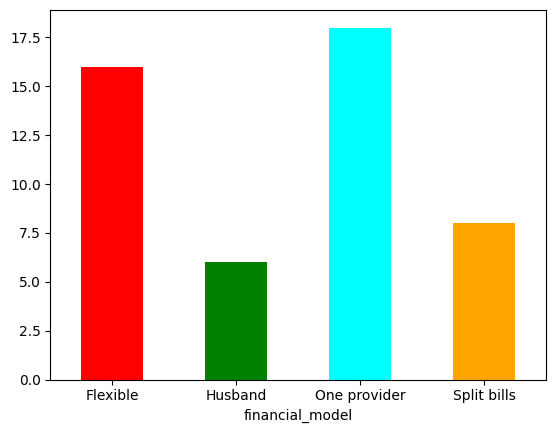

In [85]:
#Quel est le modèle financier le plus choisi globalement ?
fig, ax = plt.subplots()
colors = ["red","green","cyan","orange"]
fin_model = df.groupby("financial_model").size()
cust_labs = ["Flexible","Husband","One provider","Split bills"]
fin_model.plot(kind = "bar", ax = ax, rot =0,color = colors)
ax.set_xticklabels(cust_labs, rotation=0)

Text(0.5, 1.0, 'Modèle financier le plus choisi globalement selon le gender')

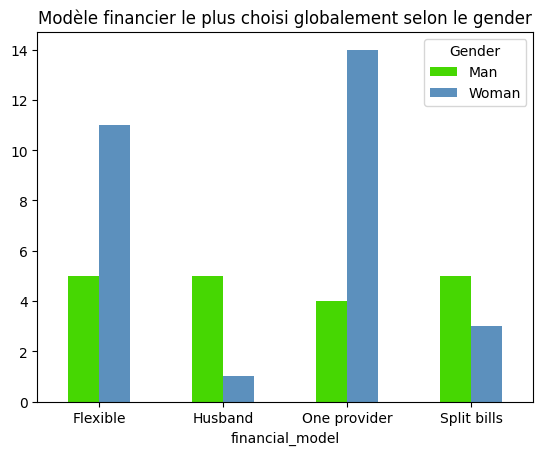

In [86]:
#Quel est le modèle financier le plus choisi globalement  selon le gender?
fig, ax = plt.subplots()
colors = np.random.rand(len(fin_model), 3)
fin_model = df.groupby(["financial_model","Gender"]).size().unstack(fill_value = 0)
cust_labs = ["Flexible","Husband","One provider","Split bills"]
fin_model.plot(kind = "bar", ax = ax, rot =0,color = colors)
ax.set_xticklabels(cust_labs, rotation=0)
plt.title("Modèle financier le plus choisi globalement selon le gender")

Text(0.5, 1.0, 'les deux partenaires travaillent vs le modèle financier')

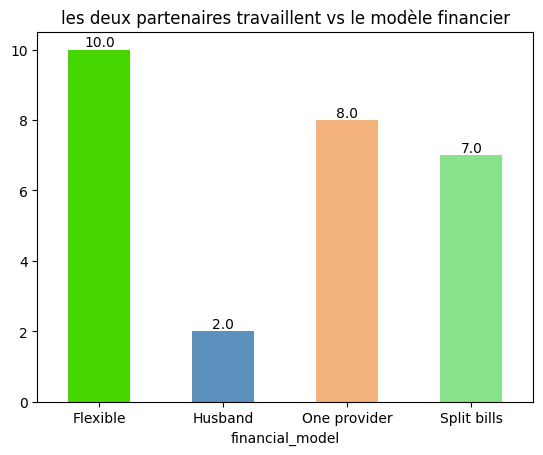

In [87]:
#Parmi les personnes qui pensent qu’il est important que les deux partenaires travaillent, quel modèle financier est le plus populaire ?
fig, ax = plt.subplots()
financial_model = df[df["both_work"] > 3].groupby("financial_model").size()
cust_labs = ["Flexible","Husband","One provider","Split bills"]
financial_model.plot(kind = "bar",rot = 0,color = colors)
ax.bar_label(ax.containers[0], fmt='%.1f')
ax.set_xticklabels(cust_labs)
plt.title("les deux partenaires travaillent vs le modèle financier")

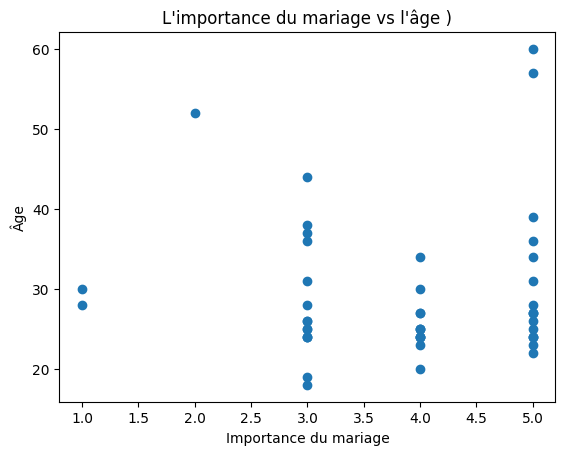

In [88]:
#L’importance du mariage augmente-t-elle avec l’âge ?
fig, ax = plt.subplots()
corr = df["Age"].corr(df["marriage_importance"])
ax.scatter(df["marriage_importance"],df["Age"])
ax.set_ylabel("Âge")
ax.set_xlabel("Importance du mariage")
ax.set_title(f"L'importance du mariage vs l'âge )")
plt.show()

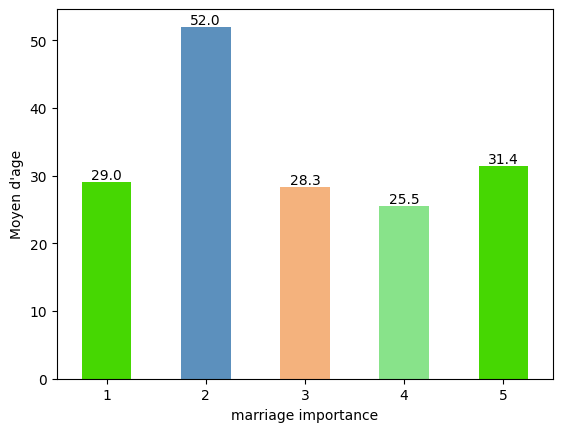

In [89]:
#âge moyen des personnes qui donnent une importance : faible (1–2) moyenne (3) élevée (4–5)
fig, ax = plt.subplots()
x = df.groupby("marriage_importance")["Age"].mean()
x.plot(kind="bar",ax = ax, rot= 0, color = colors)
ax.bar_label(ax.containers[0], fmt='%.1f')
ax.set_xlabel("marriage importance")
ax.set_ylabel("Moyen d'age")
plt.show()

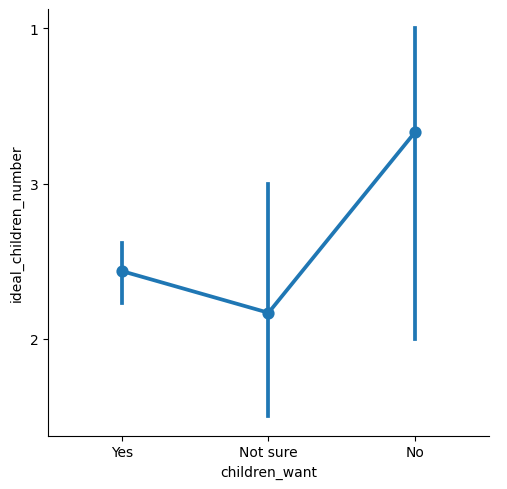

In [90]:
#Parmi ceux qui veulent des enfants:quel est le nombre idéal le plus fréquent ?
sns.catplot(x="children_want",y="ideal_children_number",data = df,kind = "point")



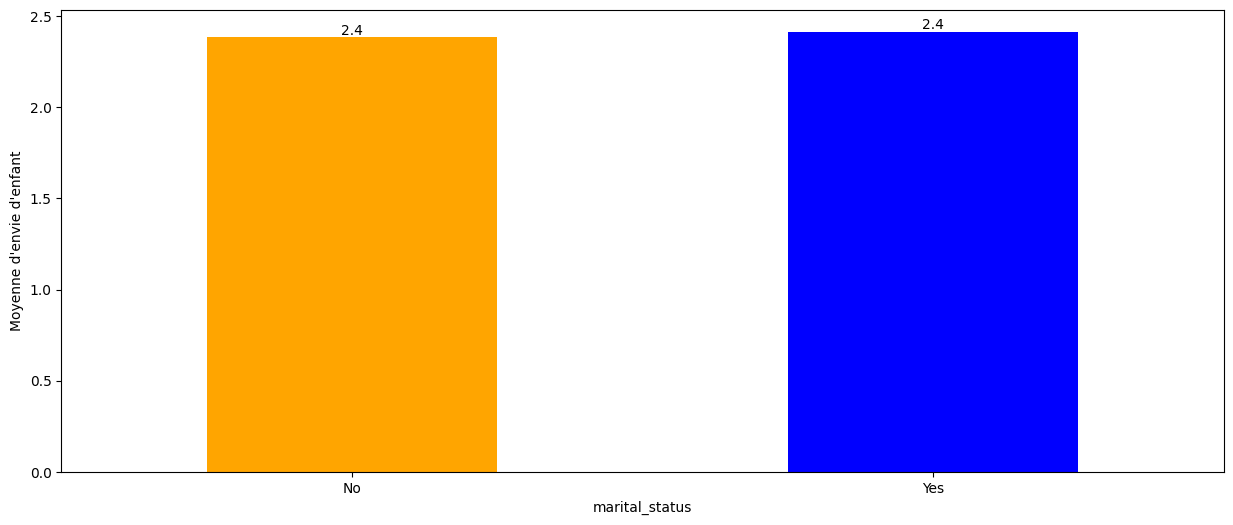

In [91]:
fig, ax = plt.subplots(figsize=(15,6))

df["ideal_children_number"] = pd.to_numeric(
    df["ideal_children_number"], errors="coerce"
)

mean_child_want = (
    df[df["children_want"] == "Yes"]
    .groupby("marital_status")["ideal_children_number"]
    .mean()
)

mean_child_want.plot(
    kind="bar",
    ax=ax,
    color=["orange", "blue"],
    rot=0
)

ax.set_ylabel("Moyenne d'envie d'enfant")

# Ajouter les labels sur TOUTES les barres
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")

plt.show()


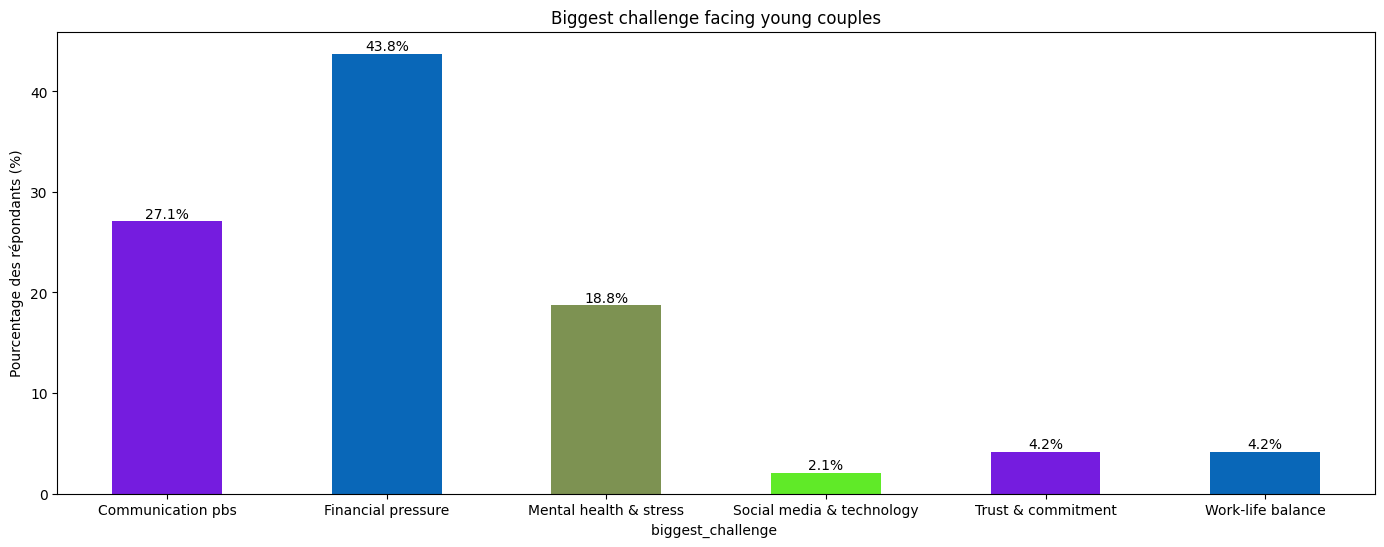

In [92]:
#Quel est le plus grand défi cité par la majorité des répondants ?
fig, ax = plt.subplots(figsize=(17, 6))
colors = np.random.rand(len(fin_model), 3)
x_labels = [ "Communication pbs", "Financial pressure", "Mental health & stress", "Social media & technology", "Trust & commitment", "Work-life balance" ]
grand_defi = df.groupby("biggest_challenge ").size()
percentages = grand_defi / grand_defi.sum() * 100
percentages.plot(kind = "bar",ax = ax,color = colors,rot = 0)
ax.bar_label(ax.containers[0], fmt="%.1f%%")
ax.set_xticklabels(x_labels)
ax.set_ylabel("Pourcentage des répondants (%)")
ax.set_title("Biggest challenge facing young couples")
plt.show()

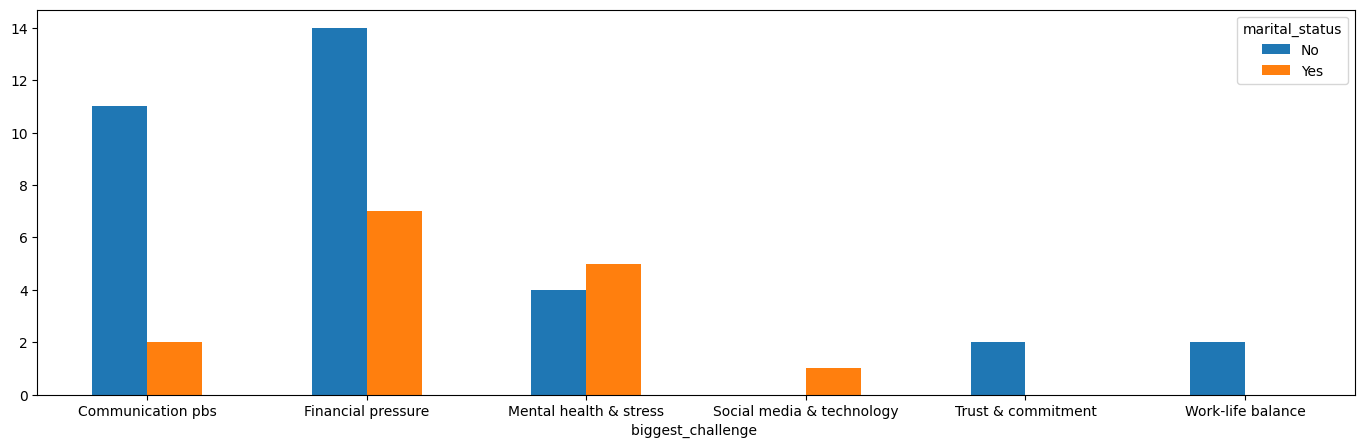

In [114]:
#Ce défi est-il le même pour : les personnes mariées vs non mariées ?
fig, ax = plt.subplots(figsize=(17,5))
x_labels = [ "Communication pbs", "Financial pressure", "Mental health & stress", "Social media & technology", "Trust & commitment", "Work-life balance" ]
defi = df.groupby(["biggest_challenge ","marital_status"]).size().unstack(fill_value=0)
defi.plot(kind = "bar",rot =0 ,ax = ax)
ax.set_xticklabels(x_labels)
plt.legend(title="marital_status")
plt.show()